# Pymaceuticals Inc.
---

### Analysis

- Capomulin, and Ramicane were the 2 drugs with the most data (time point observations), with over 200 for each. While Propriva had the fewest at less than 150. This is a significantly different sample size, more than 30%, and could affect the accuracy of the study
- Capomulin, Ramicane seem to be the most effective treatment (of the four examined more closely Capomulin, Ramicane, Infubinol, and Ceftamin) for reducing tumor volume in the test mice. Ramicane showed better results, with the largest final volume of tumors being slightly smaller than Capomulin.
- Within the Capomulin study, unsurprisingly, the larger mice tended to have larger tumors.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_results = pd.merge(study_results, mouse_metadata, on='Mouse ID', sort = True)

# Display the data table for preview
merged_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [2]:
# Checking the number of mice.
mouse = merged_results['Mouse ID']
mouse_count_list = []
for i in mouse:
    if i in mouse_count_list:
        next
    else:
        mouse_count_list.append(i)
mouse_count = len(mouse_count_list)
print(f'Number of mice: {mouse_count}')

Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merged_results[merged_results.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice2 = merged_results[merged_results.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mice2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop = 'g989'
clean_results=merged_results.drop(merged_results[merged_results['Mouse ID'] == drop].index)
clean_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse2 = clean_results['Mouse ID']
mouse_count_list2 = []
for i in mouse2:
    if i in mouse_count_list2:
        next
    else:
        mouse_count_list2.append(i)
mouse_count2 = len(mouse_count_list2)
print(f'Number of mice in cleaned data set: {mouse_count2}')

Number of mice in cleaned data set: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_results_mean = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
regimen_results_median = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
regimen_results_var = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_results_std = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
regimen_results_sem = regimen_results_std/clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()**0.5


# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_results_mean_median = pd.merge(regimen_results_mean, regimen_results_median, on='Drug Regimen')
regimen_results_var_std = pd.merge(regimen_results_var, regimen_results_std, on='Drug Regimen')
regimen_results_var_std_sem = pd.merge(regimen_results_var_std, regimen_results_sem, on='Drug Regimen')
regimen_results = pd.merge(regimen_results_mean_median, regimen_results_var_std_sem, on='Drug Regimen')

regimen_results=regimen_results.sort_index(axis=0)
regimen_results.columns=['Mean Tumor Volume', 'Median Tumor Volume', 'Tomor Volume Varience', 'Tumor Volume Std. Dev.','Tumor Volume Std. Err.']
regimen_results


,Mean Tumor Volume,Median Tumor Volume,Tomor Volume Varience,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

regimen_results2 = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()
regimen_results2


,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

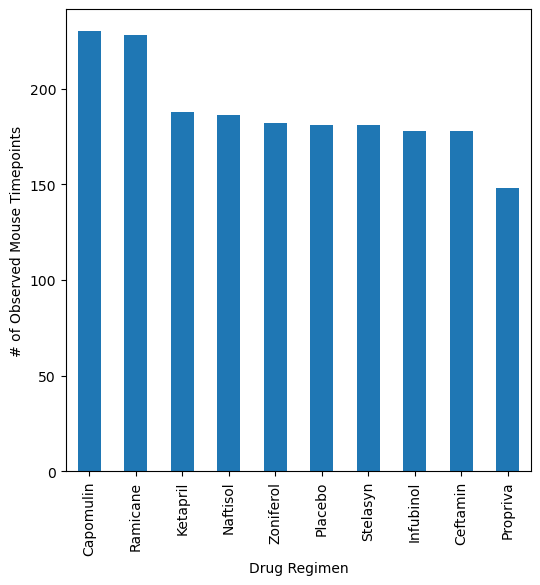

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
regimen_counts = clean_results['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', figsize = (6,6))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show


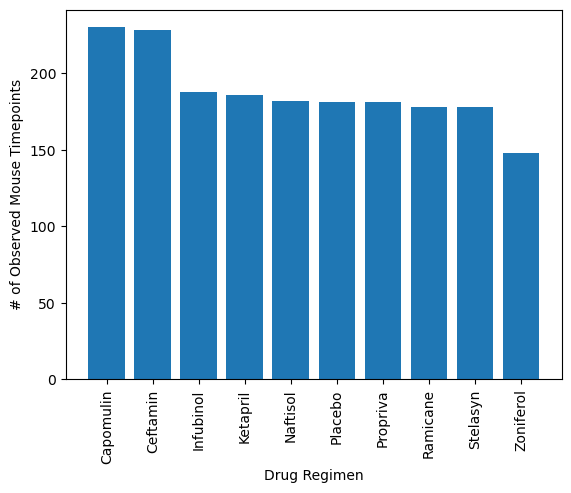

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(drug_regimen, regimen_counts)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

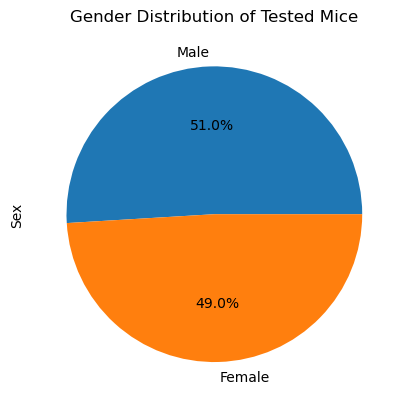

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count = clean_results['Sex'].value_counts()

gender_count.plot(kind='pie', autopct='%0.1f%%')
plt.title('Gender Distribution of Tested Mice')
plt.ylabel('Sex')
plt.show()


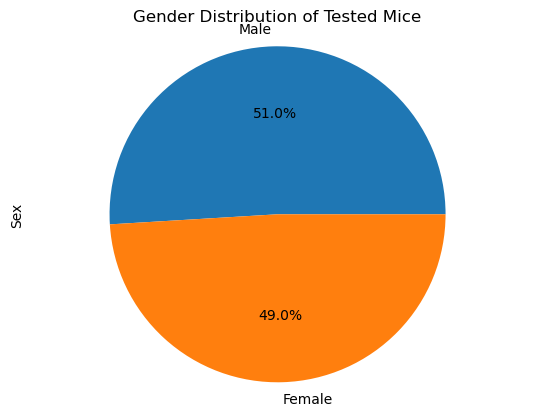

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels =['Male', 'Female']
plt.pie(gender_count, labels=labels, autopct='%0.1f%%')
plt.title('Gender Distribution of Tested Mice')
plt.axis('equal')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_results.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint_results = pd.merge(last_timepoint, clean_results, on=['Mouse ID', 'Timepoint'], how='inner')
last_timepoint_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]
processed_treatments = set()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = last_timepoint_results.loc[last_timepoint_results['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(tumor_data)
  


    for treatment, tumor_data in zip(treatments, tumor_vol):
        if treatment not in processed_treatments:
            print(f"{treatment}'s potential outliers:", end=" ")
            processed_treatments.add(treatment)

            quartiles = tumor_data.quantile([0.25, 0.75])
            lower = quartiles[0.25]
            upper = quartiles[0.75]
            iqr = upper - lower

            lower_bound = lower - 1.5 * iqr
            upper_bound = upper + 1.5 * iqr

            potential_outliers = tumor_data[(tumor_data < lower_bound) | (tumor_data > upper_bound)]

            if not potential_outliers.empty:
                print(potential_outliers)
            else:
                print(f"Series([], Name: {tumor_data.name}, dtype: {tumor_data.dtype})")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


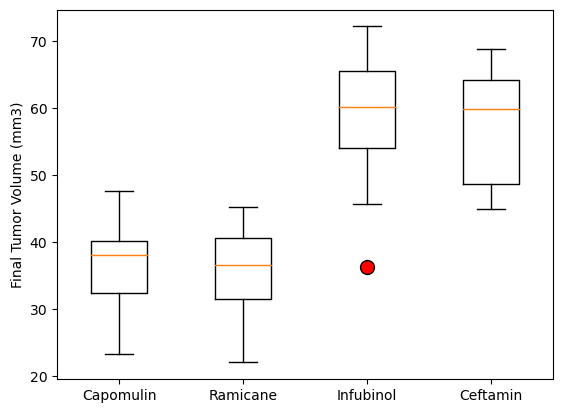

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
labels = treatments

tum_vol_dist = plt.boxplot(tumor_vol, labels=labels, flierprops={'markerfacecolor': 'red', 'markersize': 10 })

plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

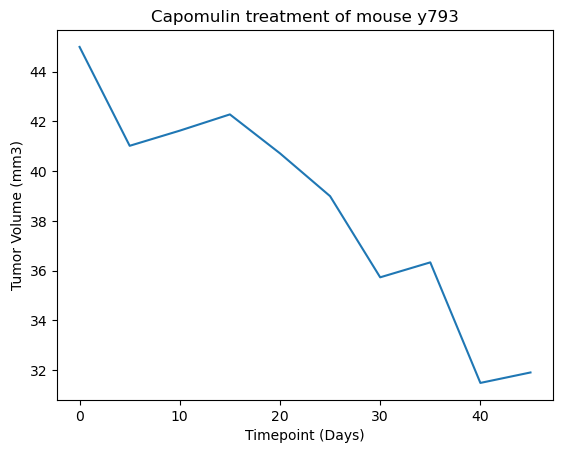

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin = clean_results[clean_results['Drug Regimen'] == 'Capomulin']
mouse_id = 'y793'
mouse_data = capomulin[capomulin['Mouse ID'] == mouse_id]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

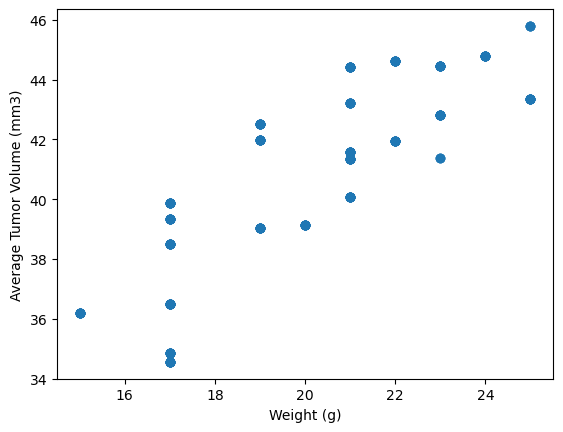

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
tumor_x_weight = pd.merge(avg_tumor_vol, capomulin[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='inner')

plt.scatter(tumor_x_weight['Weight (g)'], tumor_x_weight['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show

## Correlation and Regression

<function matplotlib.pyplot.show(close=None, block=None)>

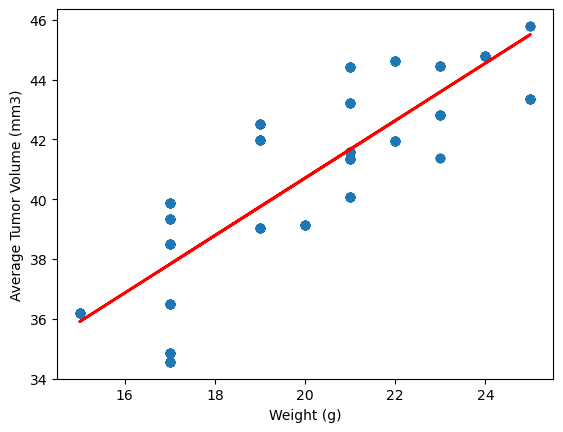

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

correlation_coefficient = np.corrcoef(tumor_x_weight['Weight (g)'], tumor_x_weight['Tumor Volume (mm3)'])[0, 1]
slope, intercept, r_value, p_value, std_err = linregress(tumor_x_weight['Weight (g)'], tumor_x_weight['Tumor Volume (mm3)'])

plt.scatter(tumor_x_weight['Weight (g)'], tumor_x_weight['Tumor Volume (mm3)'])

regression_line = slope * tumor_x_weight['Weight (g)'] + intercept
plt.plot(tumor_x_weight['Weight (g)'], regression_line, color='red', linewidth=2)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show
